## <b> Loading Libraries</b>

In [ ]:
# Importing the libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <b> Loading Data set</b>

(14.5, -0.5)

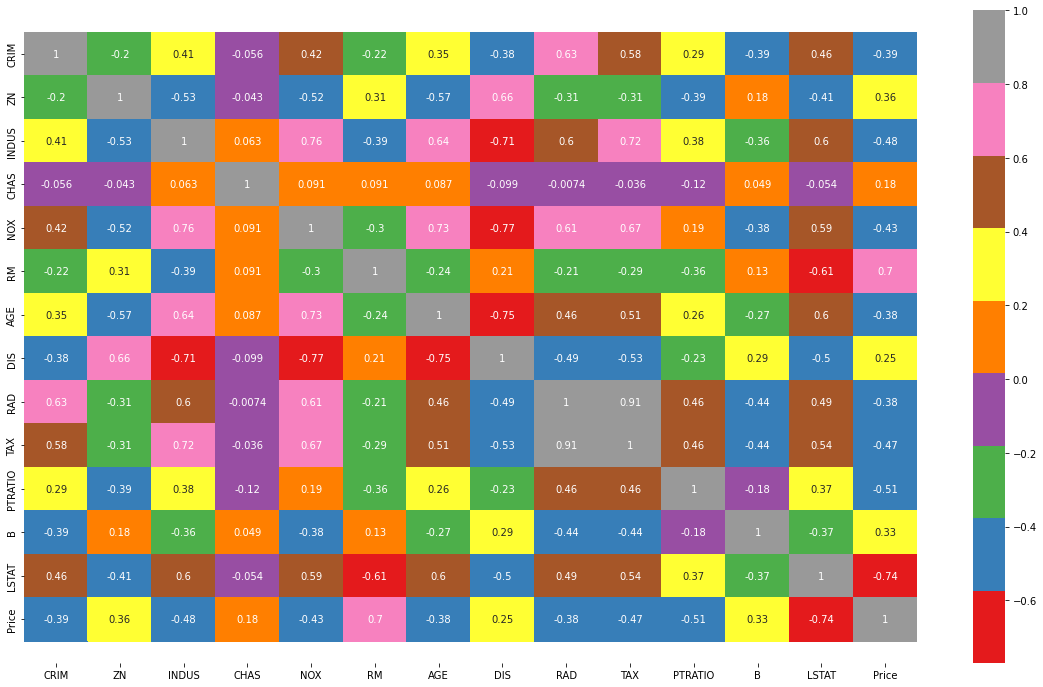

In [ ]:
#load the boston housing data which is part of sklearn package.
df=load_boston()
# Convert the dataset to DataFrame
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
# Defining the target column
dataset['Price']=df.target

# Heatmap
corr_matirx=dataset.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

## <b> Splitting and Scaling the dataset

In [ ]:
# Splitting the data in to X and y
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# checking for multicollinearity using `VIF` and `correlation matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


## Dropping the column which has VIF greater than 5

In [ ]:
X=X.drop(columns = ['TAX'], axis = 1)

## Method 0:- OLS

In [ ]:
import statsmodels.api as sm

X_ols = scaler.fit_transform(X)
# adding the constant term
X_ols = sm.add_constant(X_ols)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, X_ols).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          1.21e-133
Time:                        02:10:55   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.213    105.772      0.0

## <b> METHOD 01:- CALCULATING ADJUSTED R2 VALUE USING SIMPLE LINEAR REGRESSION

In [ ]:
# splitting data into training asnd test set
from sklearn.model_selection import train_test_split
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

In [ ]:
# fitting training data to model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# prediction of model
y_pred = lr.predict(X_test)
# training accuracy of model
print("************************************************************************************")
print("Predection of Accuracy on Train data--> ",lr.score(X_train, y_train))
print("************************************************************************************")
print("Predection on Accuracy on Test data--> ",lr.score(X_test, y_test))
print("************************************************************************************")

************************************************************************************
Predection of Accuracy on Train data-->  0.7645451026942548
************************************************************************************
Predection on Accuracy on Test data-->  0.6733825506400196
************************************************************************************


In [ ]:
# creating a function to create adhusted R-Squared
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)    
    return adjusted_r2

print("******************************************************************************")  
print("adjusted R2 Value of Train is:- ",adj_r2(X_train, y_train, lr))
print("******************************************************************************")
print("adjusted R2 value of Test is:- ",adj_r2(X_test, y_test, lr))
print("******************************************************************************")

******************************************************************************
adjusted R2 Value of Train is:-  0.7555424154443292
******************************************************************************
adjusted R2 value of Test is:-  0.642614240193065
******************************************************************************


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print("************************************************************")
print('mean squared error for test data :',mse)
print('R Square for test data :',rsq)
print("************************************************************")

************************************************************
mean squared error for test data : 27.195965766883198
R Square for test data : 0.6733825506400196
************************************************************


In [ ]:
# Intecept and coeff of the line
print('Intercept of the model(C):',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model(C): 22.456310064174733
Coefficient of the line: [-1.04242529  1.03604084  0.0777311   0.63721104 -1.8789804   2.70876672
 -0.28079317 -3.1560096   2.10632153 -1.86413286 -2.20120069  0.62151065
 -3.47239016]


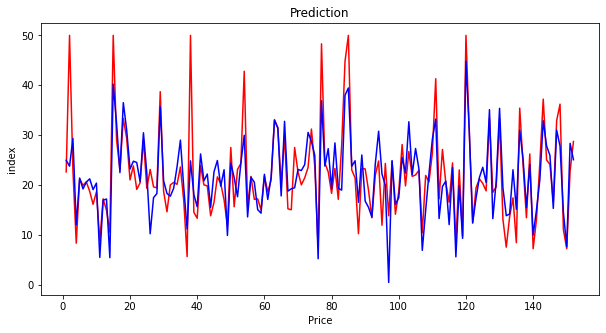

In [ ]:
# Plotting the actual and predicted values
f = plt.figure(figsize=(10,5))
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Price')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

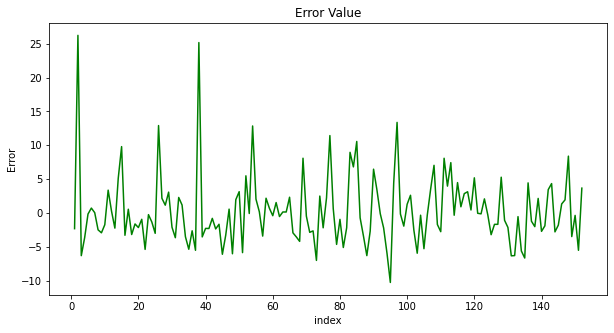

In [ ]:
# plotting the error
f = plt.figure(figsize=(10,5))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

## <b> METHOD 02:- With RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print("******************************************************************************")
print("Best alpha Value to be used for Ridge Regression:- ",ridge_regressor.best_params_)
print("Minimum MSE achived on the data is:- ",ridge_regressor.best_score_)
print("******************************************************************************")

rd = Ridge(alpha=0.01, solver='auto', random_state=42)
rd.fit(X_train, y_train)
y_pred = rd.predict(X_test)

print("Adjusted R2 Value of Train is:-",adj_r2(X_train, y_train, rd))
print("******************************************************************************")
print("R2 Value of Test is:-          ",r2_score(y_test, y_pred))
print("Adjusted R2 value of Test is:- ",adj_r2(X_test, y_test, rd))
print("Accuracy of Test prediction:-  ",rd.score(X_test, y_test))
print("******************************************************************************")

******************************************************************************
Best alpha Value to be used for Ridge Regression:-  {'alpha': 10}
Minimum MSE achived on the data is:-  -22.756818882530123
******************************************************************************
Adjusted R2 Value of Train is:- 0.7555424132990266
******************************************************************************
R2 Value of Test is:-           0.673376377620039
Adjusted R2 value of Test is:-  0.6426074856567093
Accuracy of Test prediction:-   0.673376377620039
******************************************************************************


## <b> METHOD 04:- With LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

print("******************************************************************************")
print("Best alpha Value to be used for Lasso Regression:- ",lasso_regressor.best_params_)
print("Minimum MSE achived on the data is:- ",lasso_regressor.best_score_)
print("******************************************************************************")

las = Lasso(alpha=0.001, random_state=42)
las.fit(X_train, y_train)
y_pred = las.predict(X_test)

print("Adjusted R2 Value of Train is:-",adj_r2(X_train, y_train, las))
print("******************************************************************************")
print("R2 Value of Test is:-          ",r2_score(y_test, y_pred))
print("Adjusted R2 value of Test is:- ",adj_r2(X_test, y_test, las))
print("Accuracy of Test prediction:-  ",las.score(X_test, y_test))
print("******************************************************************************")

******************************************************************************
Best alpha Value to be used for Lasso Regression:-  {'alpha': 0.01}
Minimum MSE achived on the data is:-  -22.937132821009538
******************************************************************************
Adjusted R2 Value of Train is:- 0.7555415781186454
******************************************************************************
R2 Value of Test is:-           0.6732900438087803
Adjusted R2 value of Test is:-  0.6425130189501872
Accuracy of Test prediction:-   0.6732900438087803
******************************************************************************


## <b> METHOD 04:- With ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train,y_train)

print("******************************************************************************")
print("Best alpha Value to be used for Elastic net:- ",elastic_regressor.best_params_)
print("Minimum MSE achived on the data is:- ",elastic_regressor.best_score_)
print("******************************************************************************")

ela = ElasticNet(alpha=0.001, random_state=42)
ela.fit(X_train, y_train)
y_pred = ela.predict(X_test)

print("Adjusted R2 Value of Train is:-",adj_r2(X_train, y_train, ela))
print("******************************************************************************")
print("R2 Value of Test is:-          ",r2_score(y_test, y_pred))
print("Adjusted R2 value of Test is:- ",adj_r2(X_test, y_test, ela))
print("Accuracy of Test prediction:-  ",ela.score(X_test, y_test))
print("******************************************************************************")

******************************************************************************
Best alpha Value to be used for Elastic net:-  {'alpha': 0.01}
Minimum MSE achived on the data is:-  -22.90091458611347
******************************************************************************
Adjusted R2 Value of Train is:- 0.7555408650263631
******************************************************************************
R2 Value of Test is:-           0.6732268267135761
Adjusted R2 value of Test is:-  0.6424438466213769
Accuracy of Test prediction:-   0.6732268267135761
******************************************************************************
